In [5]:
# CTRL SHIFT P > create environment 
# raccourci pour créer un venv

In [6]:
#pip install pandas

## Import des données et des librairies

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
dataframe = pd.read_csv("data.csv")
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analyse de chaque variable

### Dimensions du dataframe

In [8]:
# DATAFRAME ORIGINAL    
dataframe.shape

(1338, 7)

In [9]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Recherche de valeurs NaN

In [11]:
dataframe.isnull().describe()

,age,sex,bmi,children,smoker,region,charges
count,1338,1338,1338,1338,1338,1338,1338
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,1338,1338,1338,1338,1338,1338,1338


### Valeurs abérrantes et Boxplot

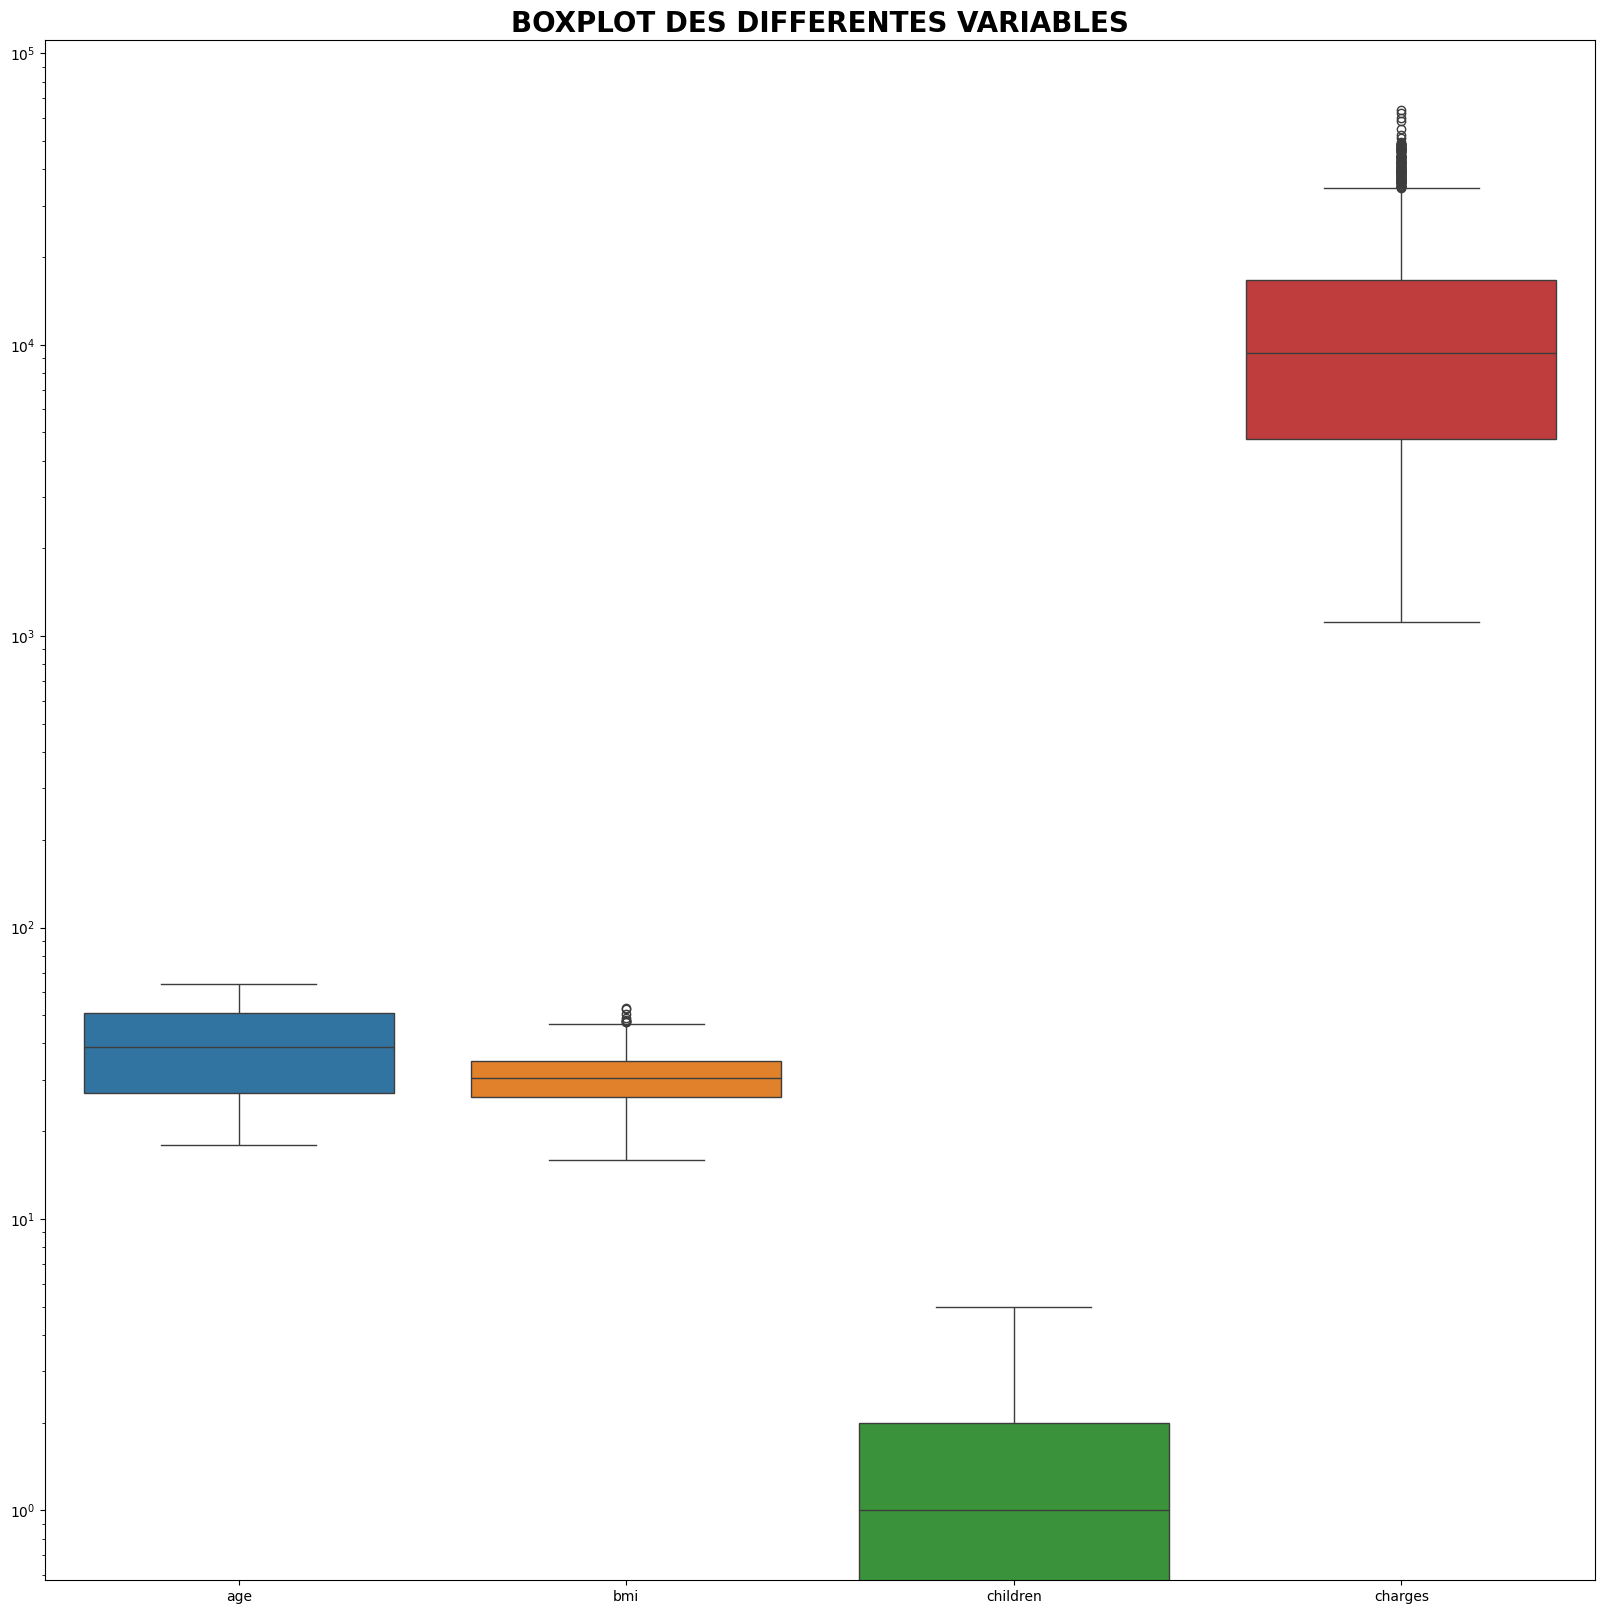

In [12]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataframe)
plt.yscale("log")

plt.title("BOXPLOT DES DIFFERENTES VARIABLES", fontsize=20, weight="bold")
plt.show()

### variable AGE

In [13]:
dataframe["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

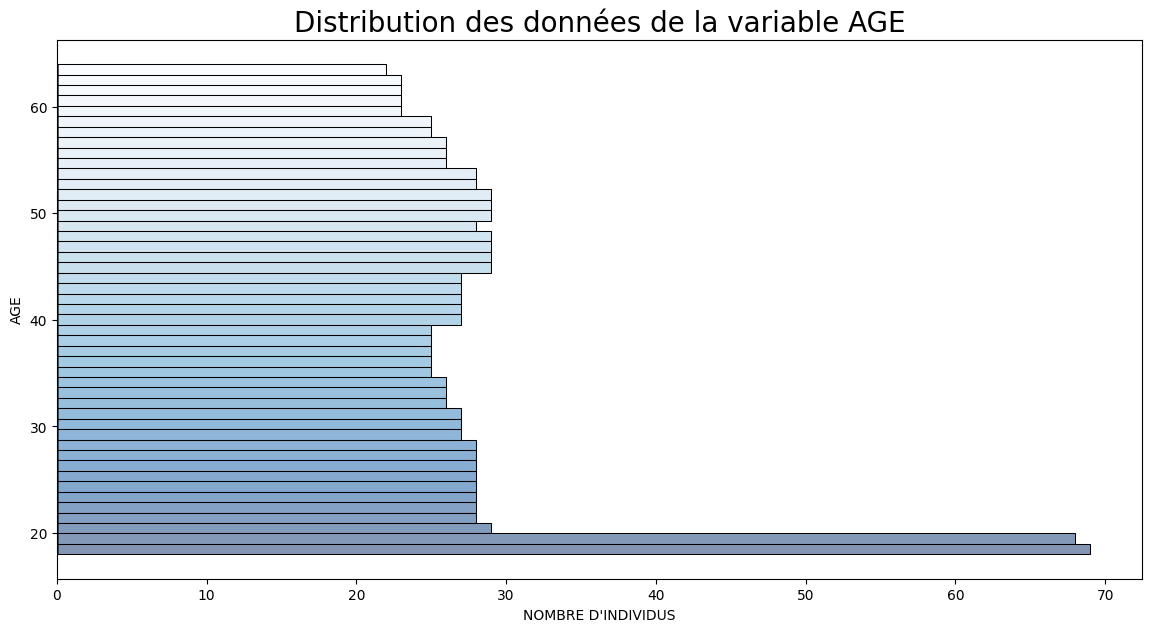

In [16]:
bins = 47
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("AGE")
plt.title("Distribution des données de la variable AGE", fontsize=20)
sns.histplot(dataframe, y="age", bins=bins, hue="age", palette="Blues_r", legend=False)
plt.show()

### variable SEX

In [17]:
dataframe["sex"].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [18]:
hommes = dataframe["sex"] == "male"
nb_hommes = dataframe[hommes]["sex"].count()
nb_femmes = dataframe[~hommes]["sex"].count()
print(f"Total clients : {nb_hommes+nb_femmes}")
print(f"Nombre total d'hommes : {nb_hommes}")
print(f"Nombre total de femmes : {nb_femmes}")

Total clients : 1338
Nombre total d'hommes : 676
Nombre total de femmes : 662


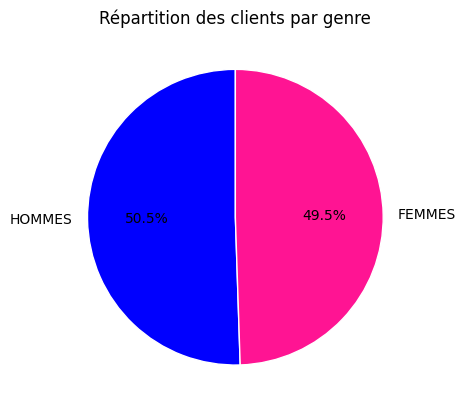

In [56]:
counts = dataframe['sex'].value_counts()
labels = ["HOMMES", "FEMMES"]
colors = ["blue", "deeppink"]

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des clients par genre')
plt.show()

### variable BMI : Indice de masse corporel

In [19]:
dataframe["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

### variable CHILDREN

In [20]:
dataframe["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [21]:
dataframe["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

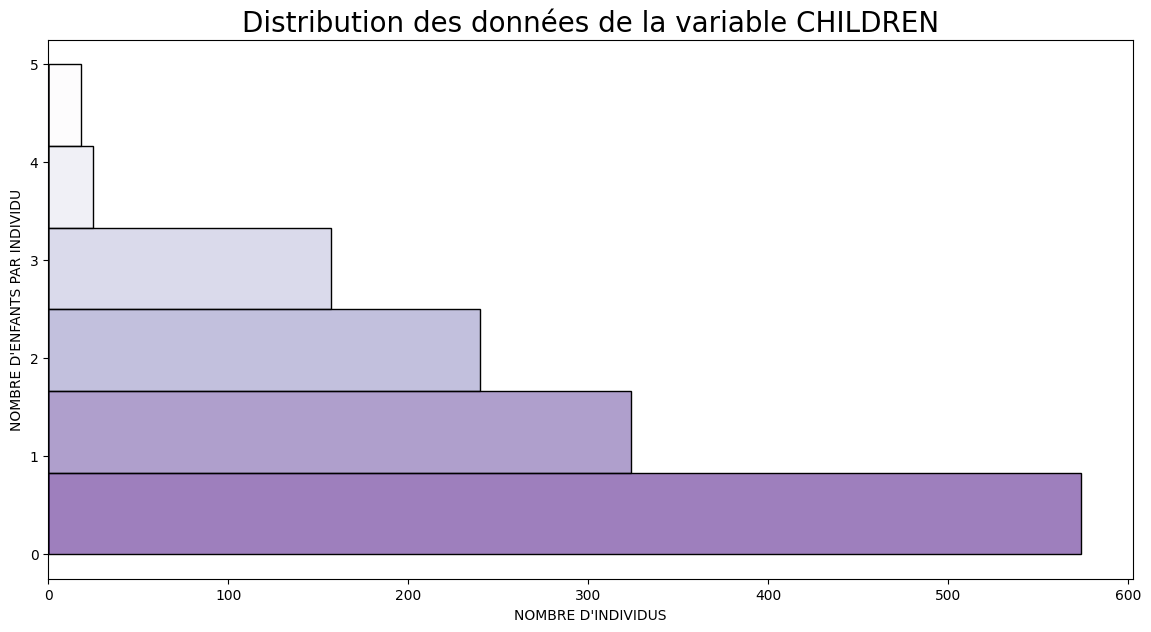

In [22]:
bins = len(dataframe["children"].value_counts())
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("NOMBRE D'ENFANTS PAR INDIVIDU")
plt.title("Distribution des données de la variable CHILDREN", fontsize=20)
sns.histplot(dataframe, y="children", bins=bins, hue="children", palette="Purples_r", legend=False)
plt.show()

### variable SMOKER

In [23]:
dataframe["smoker"].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

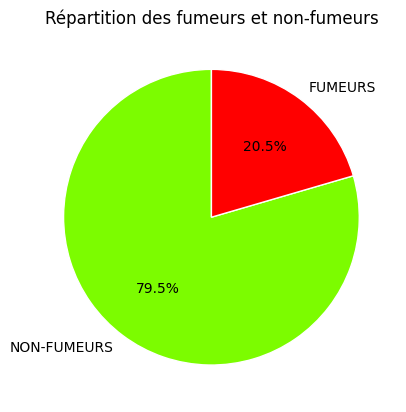

In [57]:
counts = dataframe['smoker'].value_counts()
labels = ["NON-FUMEURS", "FUMEURS"]
colors = ["lawngreen", "red"]

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des fumeurs et non-fumeurs')
plt.show()

In [67]:
# TRANSFORMATION DES VALEURS "YES" ET "NO" EN 0 ET 1
dataframe["smoker"] = dataframe["smoker"].replace({"no": 0, "yes" : 1})
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


### variable REGION

In [25]:
dataframe["region"].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

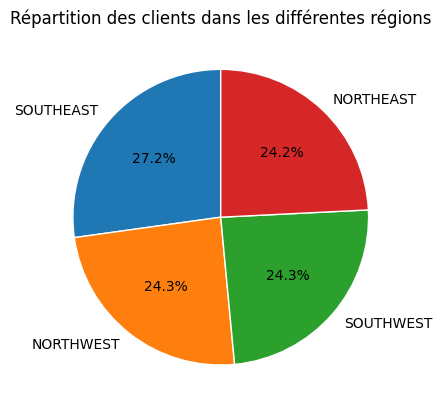

In [58]:
region_counts = dataframe['region'].value_counts()
labels = ["SOUTHEAST", "NORTHWEST","SOUTHWEST", "NORTHEAST" ]
colors = [""]

plt.pie(region_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des clients dans les différentes régions')
plt.show()

In [26]:
reg = dataframe.groupby("region").count()
reg = reg.reset_index("region")
reg = reg[["region", "age"]]
reg

,region,age
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


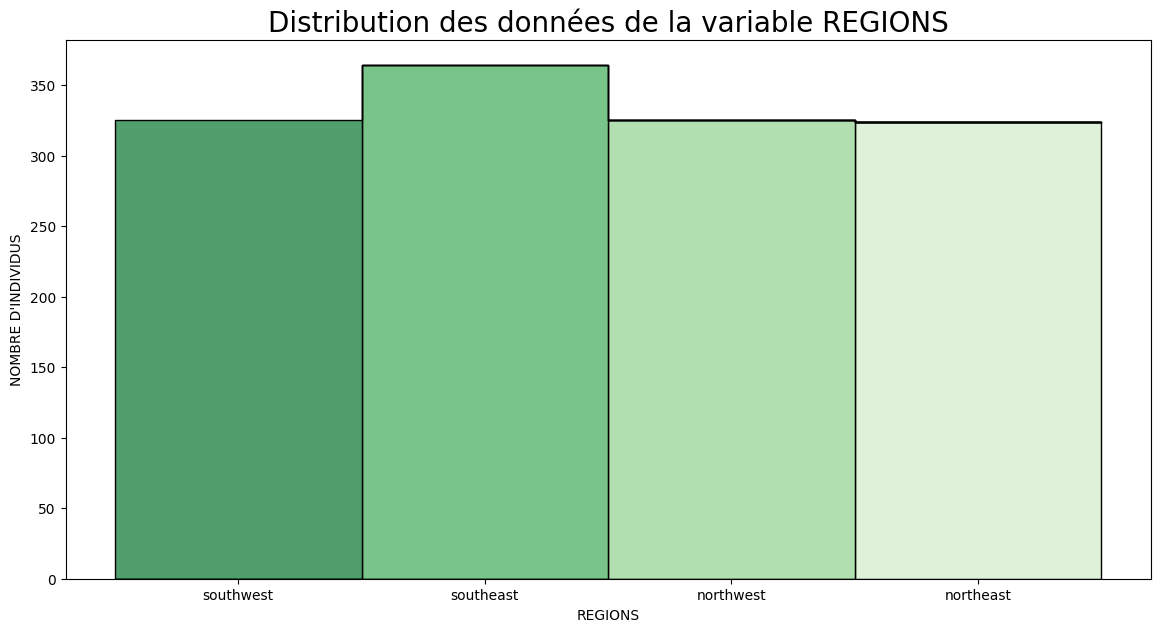

In [28]:
bins = len(reg.value_counts())
plt.figure(figsize=(14,7))
plt.ylabel("NOMBRE D'INDIVIDUS")
plt.xlabel("REGIONS")
plt.title("Distribution des données de la variable REGIONS", fontsize=20)
sns.histplot(dataframe, x="region", hue="region", palette="Greens_r", legend=False, binwidth=5, element="step", multiple="stack")
plt.show()

### variable CHARGES

In [30]:
dataframe["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [59]:
dataframe["charges"].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64